In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import pandas as pd
plt.style.use('paper.mplstyle')

In [2]:
data_path = "../csvs/other/"
p_adj = np.loadtxt(data_path + 'pratio.txt')
t_exit = np.loadtxt(data_path + 't_exit.txt')

t_exit_rolling = pd.DataFrame(t_exit)
t_exit_rolling = t_exit_rolling.rolling(10).median()
t_exit_rolling = t_exit_rolling.dropna().values
t_exit_rolling = t_exit_rolling.flatten()

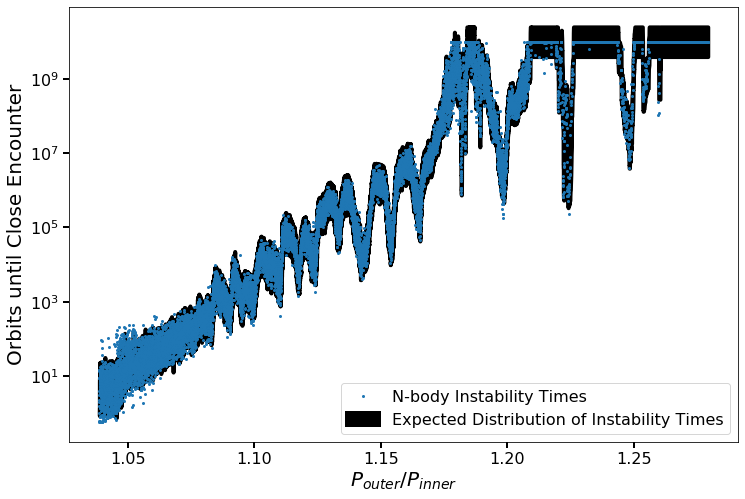

In [3]:
fig, ax = plt.subplots(1, 1, figsize=(12,8))
cmap = plt.get_cmap("tab10")

ax.fill_between(p_adj[p_adj.shape[0] - t_exit_rolling.shape[0]:], np.power(10, np.log10(t_exit_rolling)+0.4), np.power(10, np.log10(t_exit_rolling)-0.4),linewidth = 4, alpha = 1, color = 'black', label = "Expected Distribution of Instability Times")
ax.plot(p_adj, t_exit, '.', label = 'N-body Instability Times', markersize=4)

ax.set_yscale('log')

ax.set_xlabel("$P_{outer}/P_{inner}$")
ax.set_ylabel("Orbits until Close Encounter")


ax.legend()
fig.savefig('obertas.pdf', bbox_inches='tight')